##MNIST Handwritten Digits Using CNN

In [ ]:
# import necessary librariese
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Again important necessary libraries
from numpy import unique, argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model

In [ ]:
# Loading MNIST datasets
(x_train, y_train),(x_test, y_test)=load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# show the shapes
print('Oringinal Shape')
print(f'x_train.shape : {x_train.shape}')
print(f'y_train.shape : {y_train.shape}')
print(f'x_test.shape : {x_test.shape}')
print(f'y_test.shape : {y_test.shape}')

Oringinal Shape
x_train.shape : (60000, 28, 28)
y_train.shape : (60000,)
x_test.shape : (10000, 28, 28)
y_test.shape : (10000,)


In [ ]:
#Reshaping the training and tesing data
print('Reshape x_train and x_test')
x_train = x_train.reshape((x_train.shape[0],x_train.shape[1],x_train.shape[2],1))
print(x_train.shape)
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1],x_test.shape[2],1))
print(x_test.shape)

Reshape x_train and x_test
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
# Normalising the values of pixels of images
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

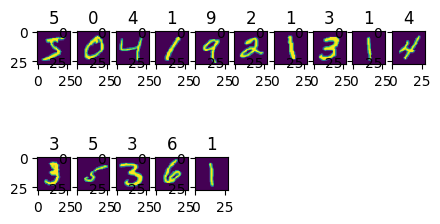

In [ ]:
fig = plt.figure(figsize=(5,3))
for i in range(15):
  ax= fig.add_subplot(2,10,i+1)
  ax.imshow(np.squeeze(x_train[i]))
  ax.set_title(y_train[i])

In [ ]:
# determine the shape of the input images
img_shape = x_train.shape[1:]
print(img_shape)

(28, 28, 1)


In [ ]:
# defining the model
model = Sequential()
model.add(Conv2D(32,(3,3), activation= 'relu', input_shape= img_shape))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(48, (3,3), activation= 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dense(500, activation='Softmax'))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 48)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 48)          0         
                                                                 
 flatten_1 (Flatten)         (None, 1200)             

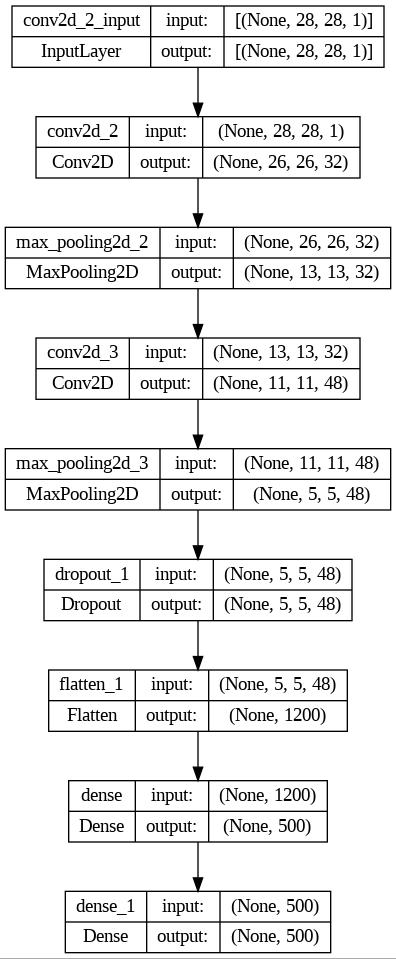

In [ ]:
#summary
model.summary()
plot_model(model,'model.jpg',show_shapes=True)

In [ ]:
# complile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# fit the model
x= model.fit(x_train, y_train, epochs=10, batch_size=128,verbose=2, validation_split=0.1)

Epoch 1/10
422/422 - 8s - loss: 0.3924 - accuracy: 0.8904 - val_loss: 0.0708 - val_accuracy: 0.9797 - 8s/epoch - 19ms/step
Epoch 2/10
422/422 - 2s - loss: 0.0931 - accuracy: 0.9708 - val_loss: 0.0463 - val_accuracy: 0.9885 - 2s/epoch - 5ms/step
Epoch 3/10
422/422 - 2s - loss: 0.0635 - accuracy: 0.9798 - val_loss: 0.0432 - val_accuracy: 0.9878 - 2s/epoch - 5ms/step
Epoch 4/10
422/422 - 2s - loss: 0.0535 - accuracy: 0.9834 - val_loss: 0.0329 - val_accuracy: 0.9918 - 2s/epoch - 4ms/step
Epoch 5/10
422/422 - 2s - loss: 0.0440 - accuracy: 0.9861 - val_loss: 0.0345 - val_accuracy: 0.9902 - 2s/epoch - 4ms/step
Epoch 6/10
422/422 - 2s - loss: 0.0390 - accuracy: 0.9876 - val_loss: 0.0423 - val_accuracy: 0.9883 - 2s/epoch - 4ms/step
Epoch 7/10
422/422 - 2s - loss: 0.0357 - accuracy: 0.9884 - val_loss: 0.0325 - val_accuracy: 0.9910 - 2s/epoch - 4ms/step
Epoch 8/10
422/422 - 2s - loss: 0.0315 - accuracy: 0.9899 - val_loss: 0.0291 - val_accuracy: 0.9918 - 2s/epoch - 4ms/step
Epoch 9/10
422/422 - 2s

In [ ]:
# testing
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Accuracy : {accuracy*100}')

Accuracy : 99.22999739646912


In [ ]:
image = x_train[5]

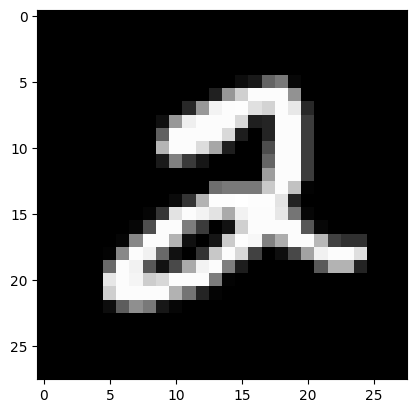

In [ ]:
# let display the image which we want to predict
plt.imshow(np.squeeze(image),cmap='gray')
plt.show()

In [ ]:
image= image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
p=model.predict([image])
print('predicted: {}'.format(argmax(p)))

1/1 [==============================] - 0s 246ms/step
predicted: 2
